In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
%matplotlib inline

In [7]:
trainSet = pd.read_csv(r'train.csv')
testSet = pd.read_csv(r'test.csv')

In [8]:
trainSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Observations
- Age, Embarked and Cabin have some missing values
- Age's format is float

In [12]:
#drop PassengerId and Ticket since they are less useful for prediction
trainSet = trainSet.drop(["PassengerId","Ticket"],axis=1)

In [14]:
collections.Counter(trainSet["Pclass"])

Counter({1: 216, 2: 184, 3: 491})

In [26]:
cls_df = trainSet[["Pclass","Survived"]].groupby(["Pclass"],as_index = False).mean()
cls_df

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


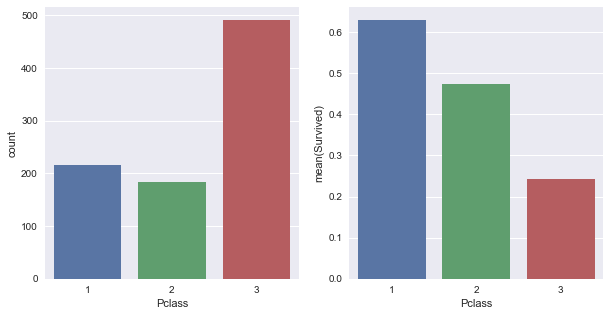

In [32]:
plt.figure(1,(10,5))
plt.subplot(121)
sns.countplot(x="Pclass",data=trainSet)
plt.subplot(122)
sns.barplot(x="Pclass",y="Survived",data=cls_df)